# 딥러닝 실습_붓꽃데이터

## 필요 모듈

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Seed = 826 # 시드 고정하기. 시드 고정한 거에 대해 검증을 해야한다. 중간에 틀어지기도 한다.

# random.seed(Seed)
# tf.random.set.seed(Seed)

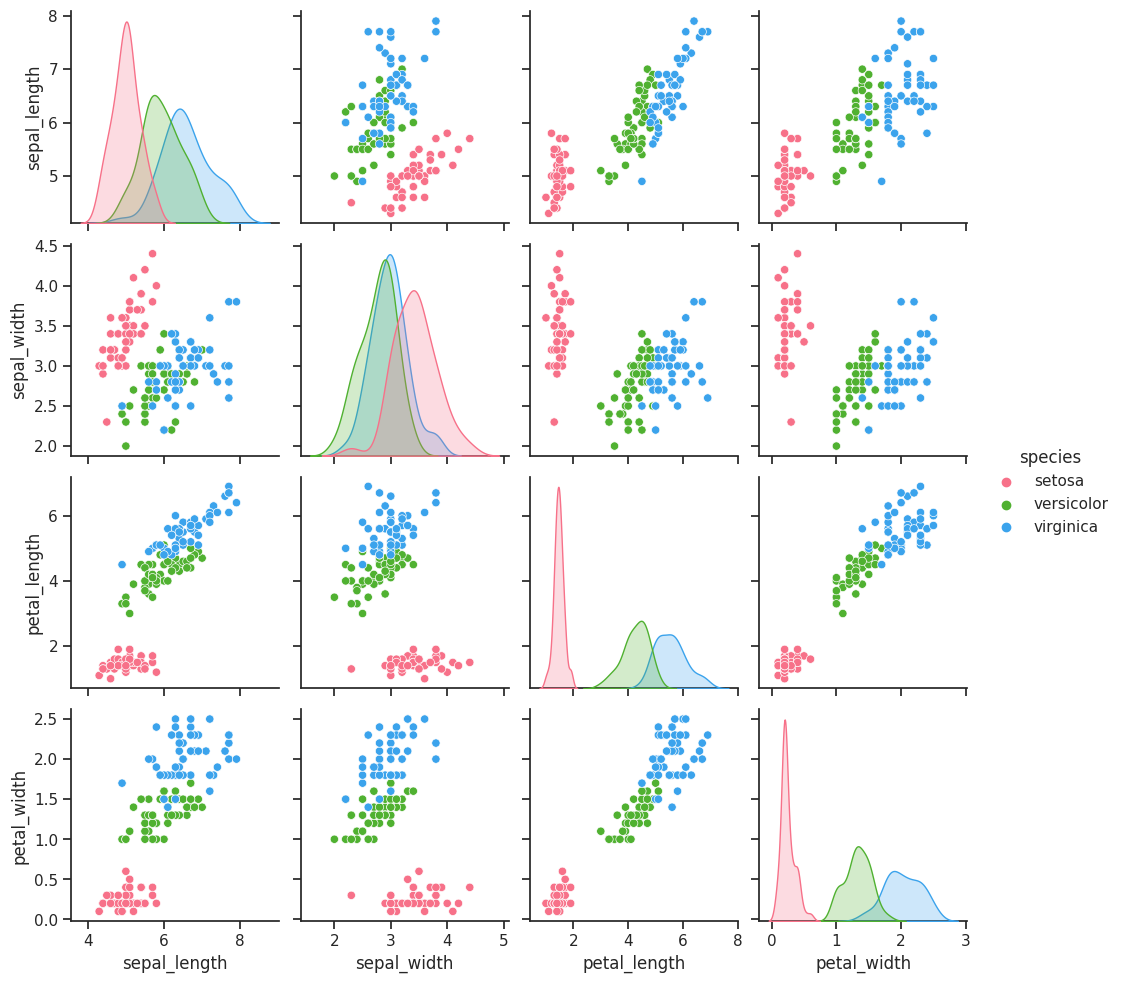

In [ ]:
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue="species", palette="husl")

## 데이터 생성

In [ ]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(4,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# 설정하지 않으면 기본 배치 사이즈는 32.

Epoch 1/100
4/4 [==============================] - 4s 190ms/step - loss: 1.1918 - accuracy: 0.1667 - val_loss: 1.1939 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0777 - accuracy: 0.3667 - val_loss: 1.0761 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 52ms/step - loss: 0.9929 - accuracy: 0.3667 - val_loss: 1.0081 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9141 - accuracy: 0.4417 - val_loss: 0.9240 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8324 - accuracy: 0.6917 - val_loss: 0.8587 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7676 - accuracy: 0.6917 - val_loss: 0.7848 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7054 - accuracy: 0.6917 - val_loss: 0.7277 - val_accuracy: 0.5667
Epoch 8/100
4/4 [==

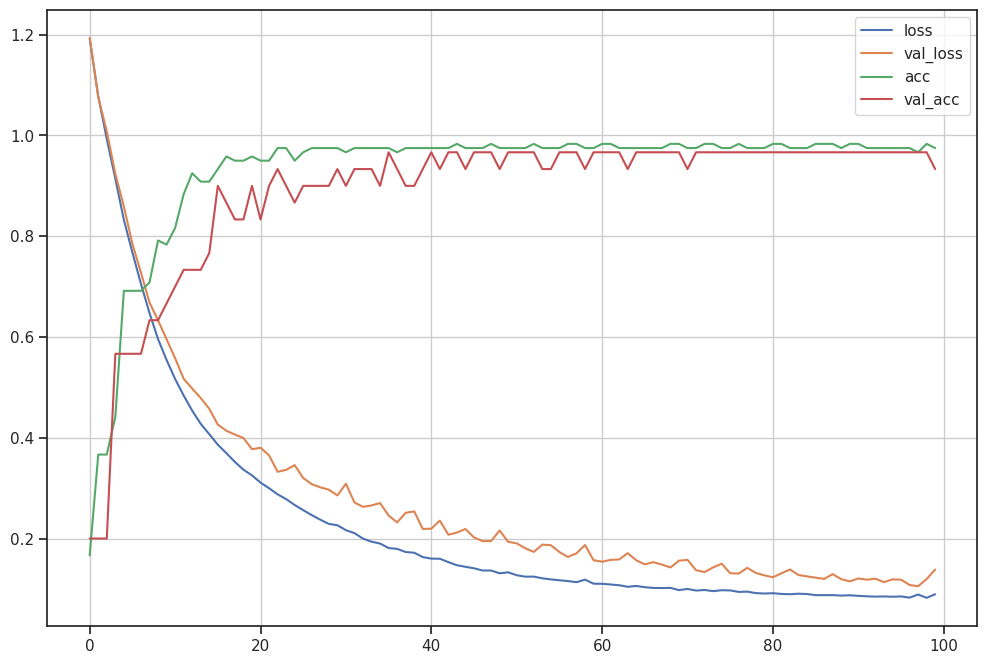

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 80ms/step - loss: 0.1385 - accuracy: 0.9333
Accuracy = 0.93


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

1/1 [==============================] - 0s 180ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


# 모델 성능 검증 및 향상

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test))

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 4s 56ms/step - loss: 0.6789 - accuracy: 0.5750 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 2/200
10/10 [==============================] - 0s 18ms/step - loss: 0.6686 - accuracy: 0.5875 - val_loss: 0.6346 - val_accuracy: 0.8000
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.6574 - accuracy: 0.6250 - val_loss: 0.6231 - val_accuracy: 0.8000
Epoch 4/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6485 - accuracy: 0.6500 - val_loss: 0.6115 - val_accuracy: 0.8000
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6388 - accuracy: 0.6750 - val_loss: 0.6007 - val_accuracy: 0.6500
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.6291 - accuracy: 0.7000 - val_loss: 0.5915 - val_accuracy: 0.7000
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6189 - accuracy: 0.7000 - val_loss: 0.5809 - val_accuracy: 0.7500
Epoch 8

## 모델 저장

In [ ]:
#모델 저장
model.save('model_test.hdf5')

In [ ]:
#모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('model_test.hdf5')

In [ ]:
#모델 성능 재확인
loss_n, accuracy_n = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_n:.4f}")
print(f"Test Accuracy: {accuracy_n:.4f}")

1/1 [==============================] - 0s 208ms/step - loss: 0.3709 - accuracy: 0.9000
Test Loss: 0.3709
Test Accuracy: 0.9000


## 그래프로 과적합 확인하기

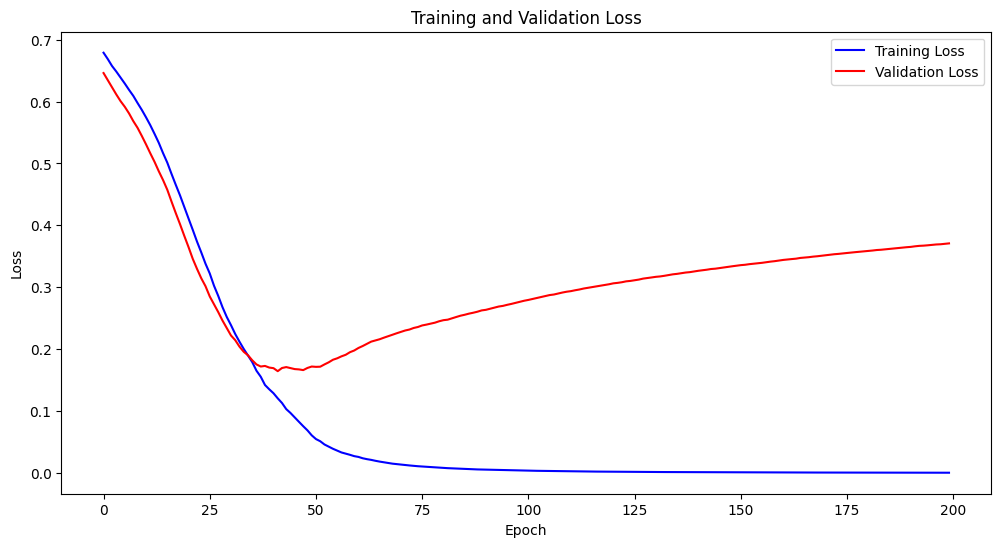

In [ ]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## 학습중단

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 모델 학습 (early stopping 적용)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 2s 41ms/step - loss: 0.6942 - accuracy: 0.4750 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6920 - accuracy: 0.4875 - val_loss: 0.6939 - val_accuracy: 0.5500
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.4875 - val_loss: 0.6937 - val_accuracy: 0.5500
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5250 - val_loss: 0.6934 - val_accuracy: 0.5500
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.5250 - val_loss: 0.6934 - val_accuracy: 0.5500
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.6867 - accuracy: 0.5250 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.5375 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 8/200

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

val_acc_list = []
fold_num = 1
results = {}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 구조 정의
    model = Sequential([
        Dense(128, activation='relu', input_dim=20),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 검증 데이터로 평가
    _, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_acc_list.append(val_acc)

    # 각 fold의 결과 저장
    results[f"Fold {fold_num} Accuracy"] = val_acc
    fold_num += 1

In [ ]:
results

# K-fold 결과 출력
print(f"5-fold Validation Accuracy: {np.mean(val_acc_list):.4f} ± {np.std(val_acc_list):.4f}")

5-fold Validation Accuracy: 0.8800 ± 0.0400


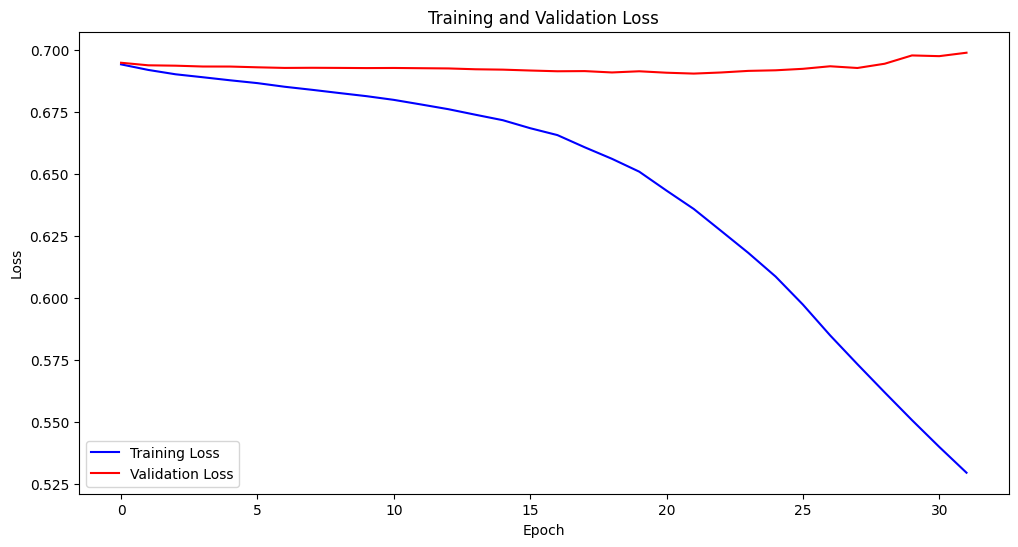

In [ ]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()